<a href="https://colab.research.google.com/github/sagebanks/Data-Science/blob/main/Banks_Stats_Lab_9_Linear_Model_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

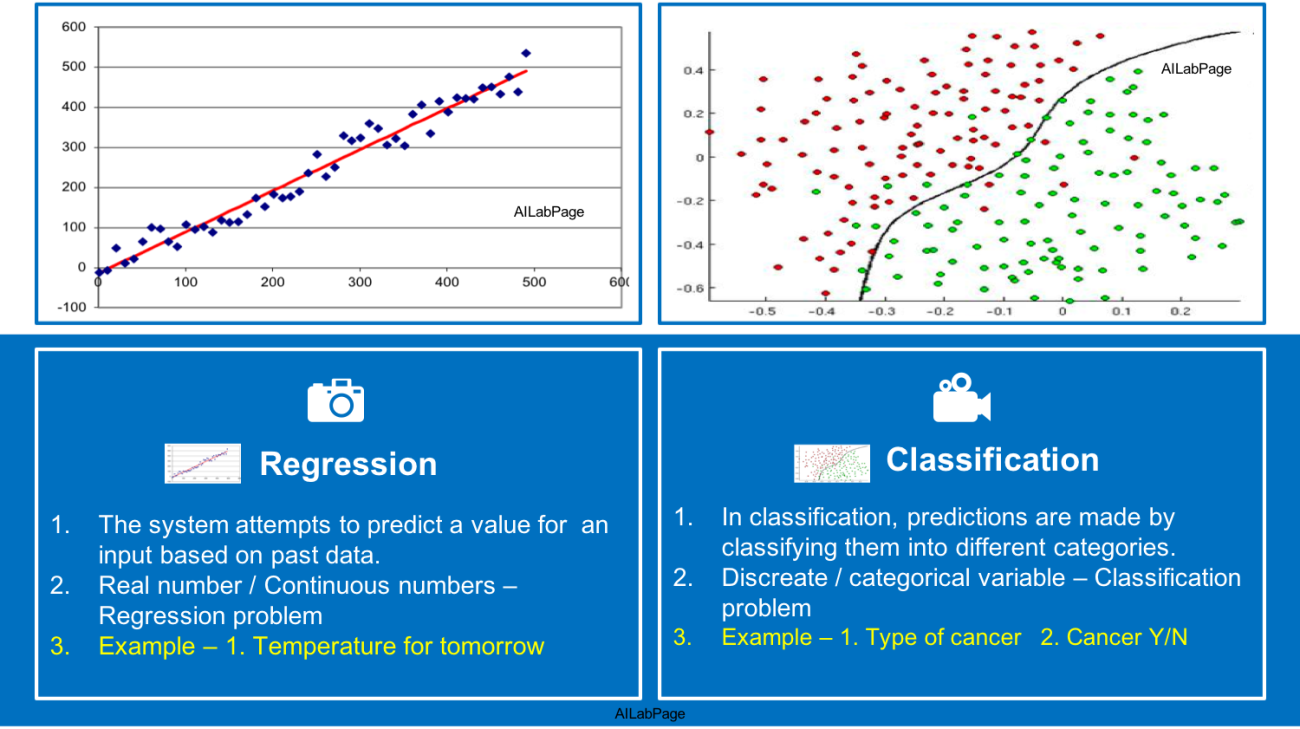

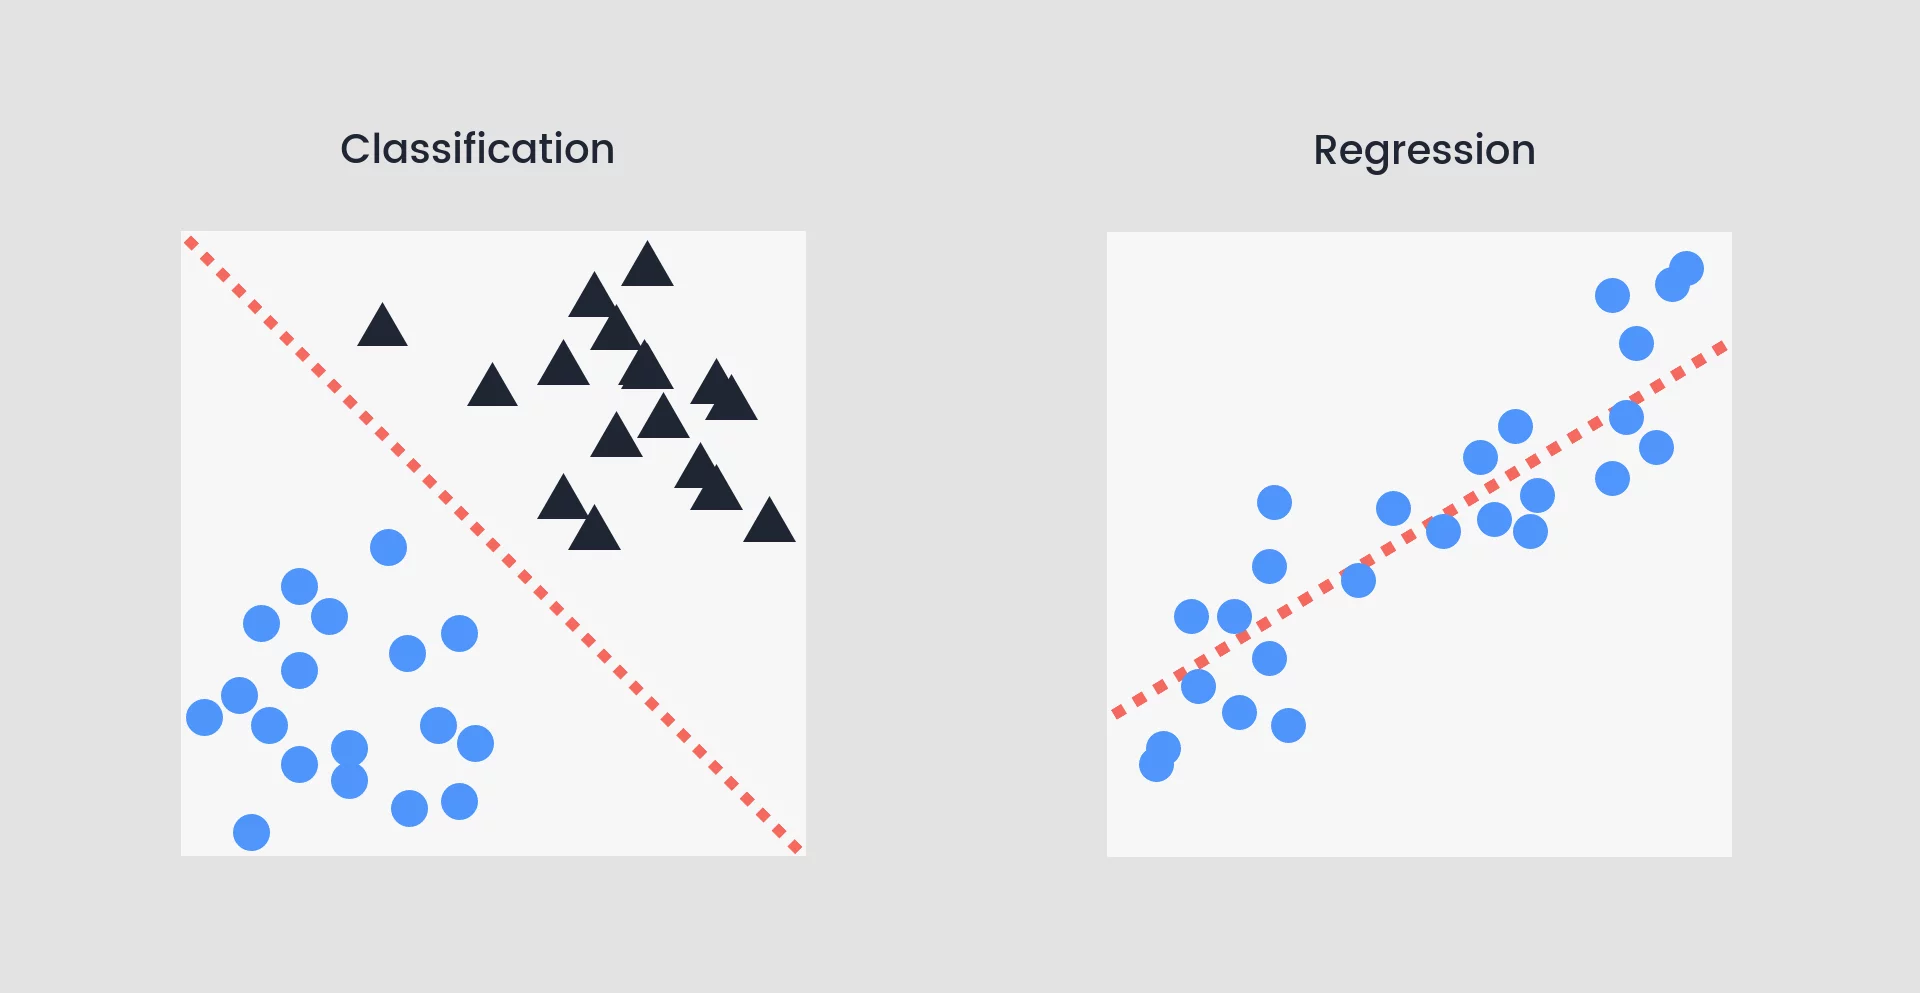

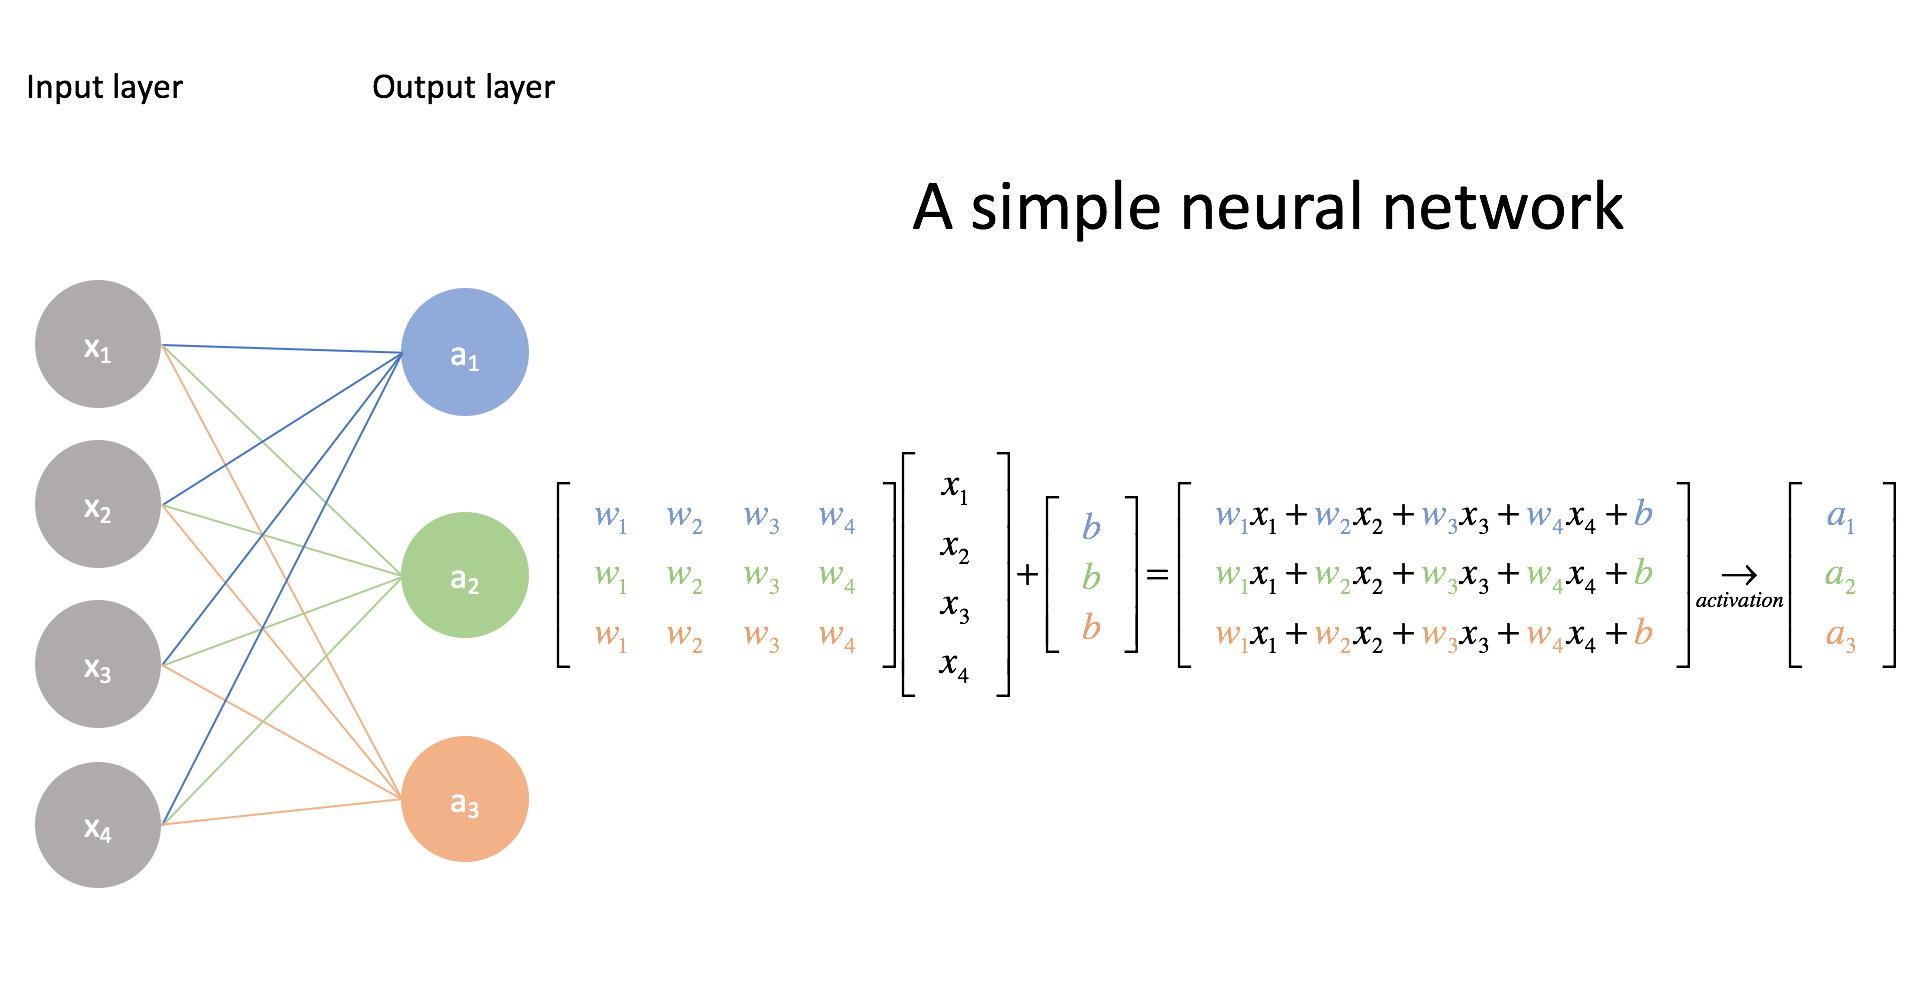

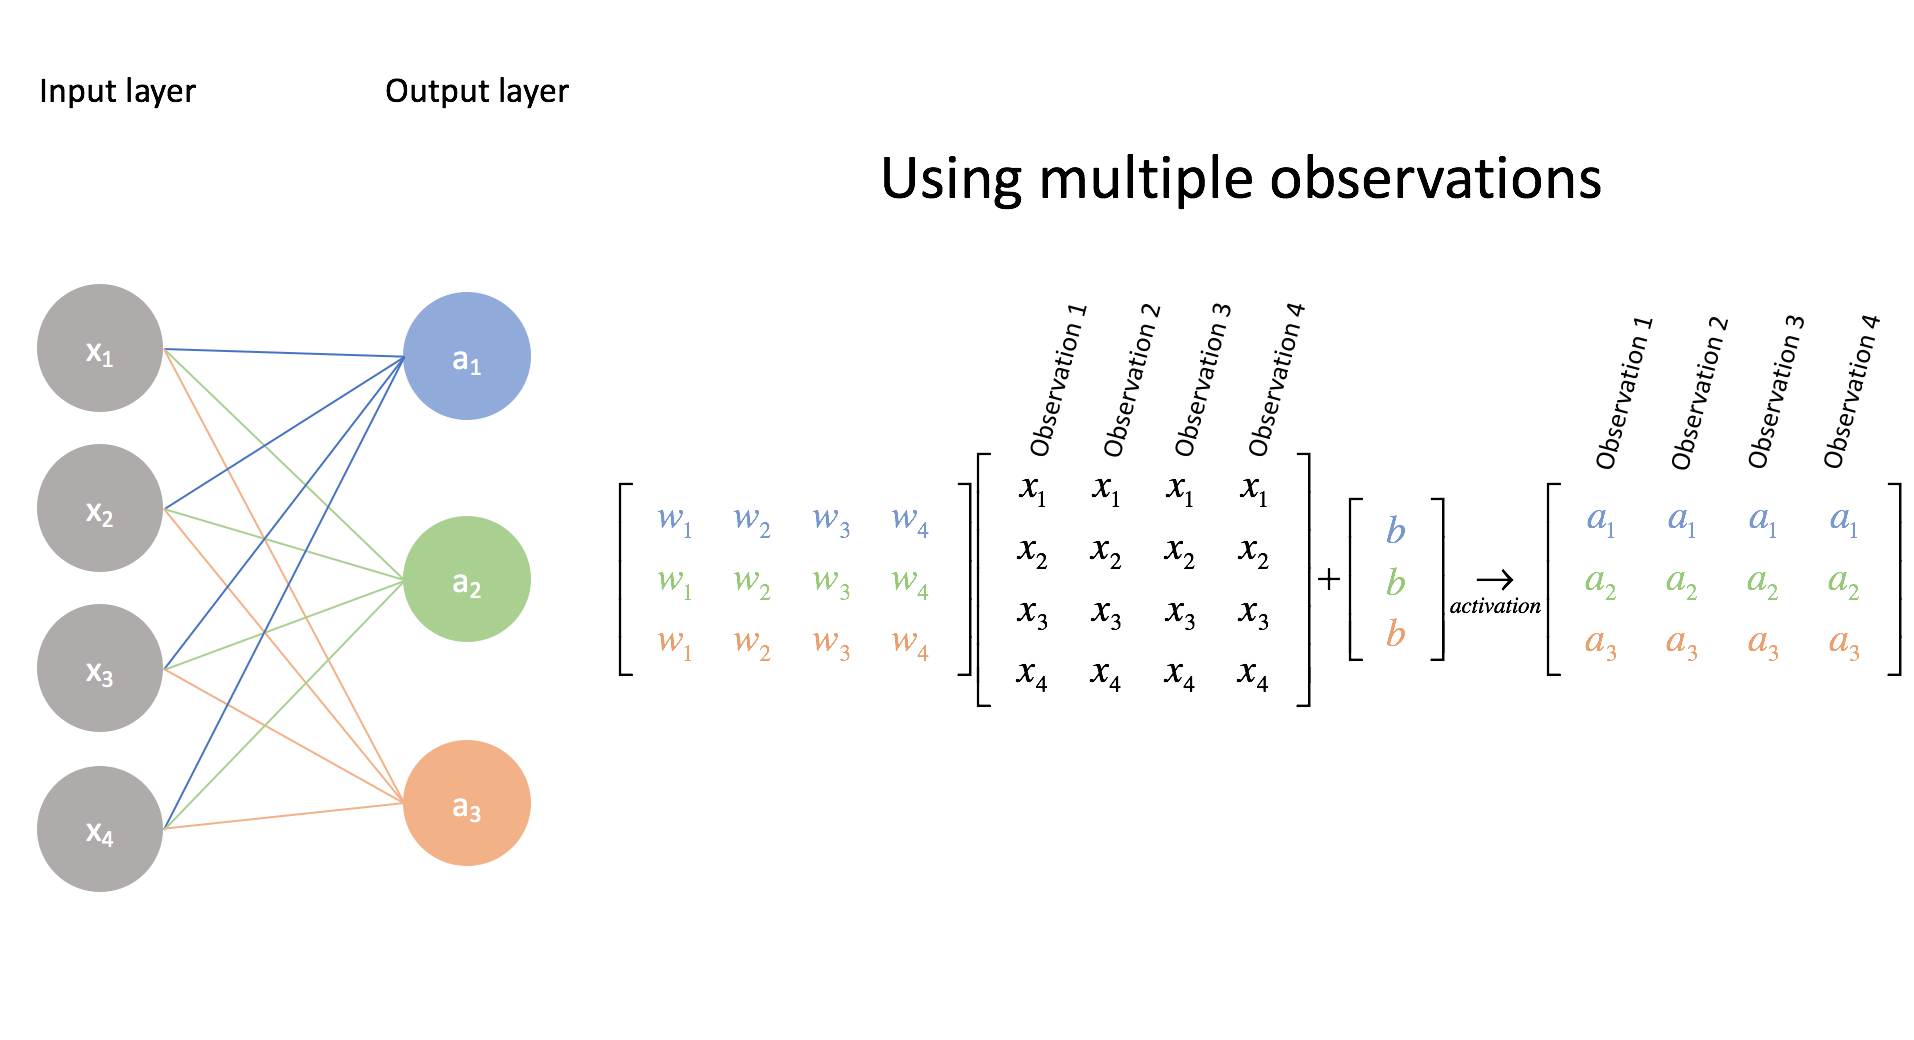

In [1]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-_2oiblgp
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-_2oiblgp
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-py3-none-any.whl size=7682 sha256=8b1c47b610270c327ed0c26ed11042d90a327d0e4b575931a0ffb597cb302f6c
  Stored in directory: /tmp/pip-ephem-wheel-cache-p_yvhvnj/wheels/8e/ce/5f/35330a2ccb2f50a7b7061e8a8b87f1ebe8d617d383beddc76f
Successfully built ImportMPCR


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=61a095d7d0ba004d6da3e3c698caf9730dc07393d825f90c3ceb314e80896a4a
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


# $y=mx+b$

In [2]:
#the equation for slope on a graph

In [3]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [4]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [5]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [6]:
##MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [8]:
X.shape

(60000, 1, 28, 28)

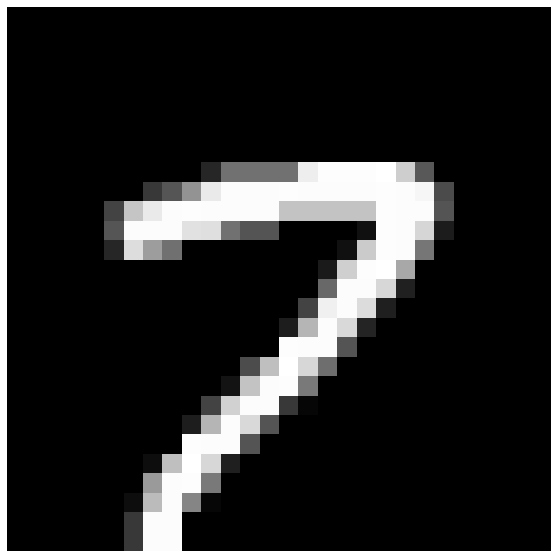

In [9]:
plot(X[123,0,0:28,0:28])

In [54]:
#ploted the numbers from above to get this picture

In [10]:
Y[123]

7

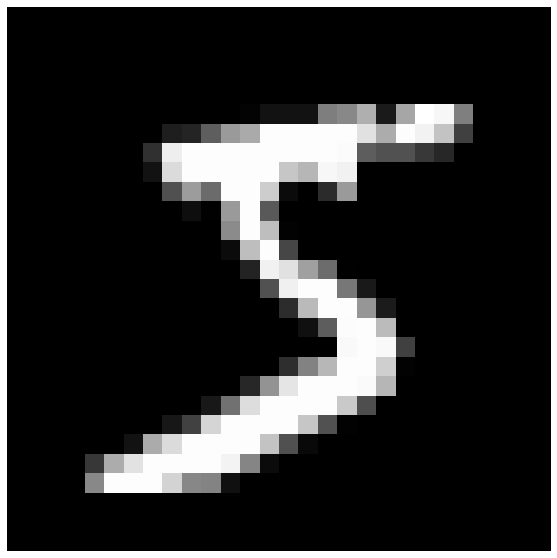

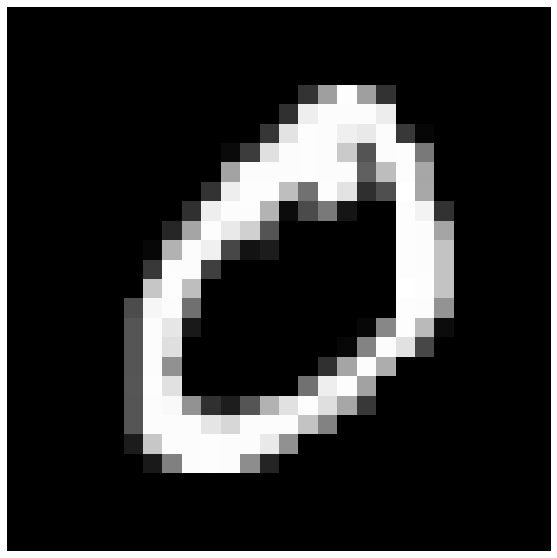

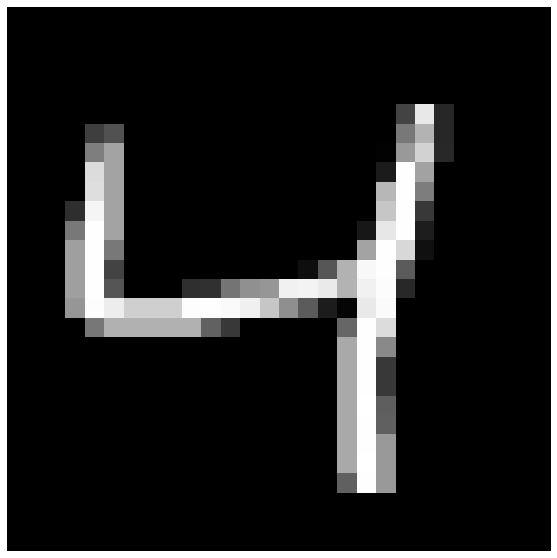

In [11]:
for i in range(3):
    plot(X[i,0,:,:])

In [12]:
Y

array([5, 0, 4, ..., 5, 6, 8])

In [13]:
X[0:25,0,:,:].shape

(25, 28, 28)

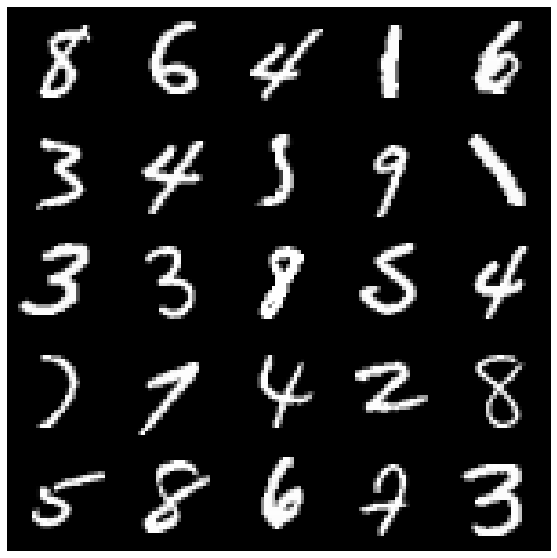

In [14]:
montage_plot(X[125:150,0,:,:])

In [55]:
#the full pictyre the plots are coming from

In [15]:
X.shape[0]

60000

In [16]:
X_test.shape

(10000, 1, 28, 28)

In [17]:
X.shape[0]

60000

In [18]:
X_test.shape[0]

10000

In [19]:
28*28

784

In [20]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [21]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

In [22]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

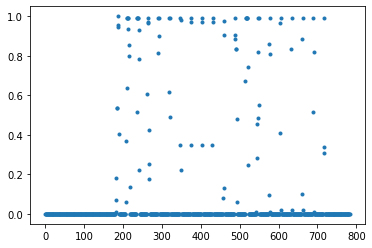

In [23]:
plt.plot(X[100],'.')

In [56]:
#ploted the data from above to create a busy looking dot graph

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

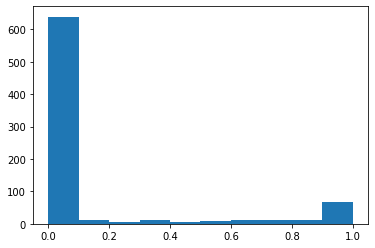

In [24]:
plt.hist(X[0])

In [57]:
#plotting the array into a bar graph

In [25]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [26]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  
wget.download(url,"W.data")

'W.data'

In [27]:
W = torch.load("W.data")

In [28]:
W.shape

torch.Size([784, 10])

In [29]:
X.shape

torch.Size([60000, 784])

In [30]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()

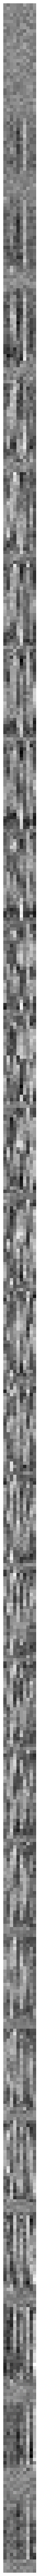

In [31]:
plot(W[0:784,:10])

In [58]:
#plotting parts of the picture from the link above

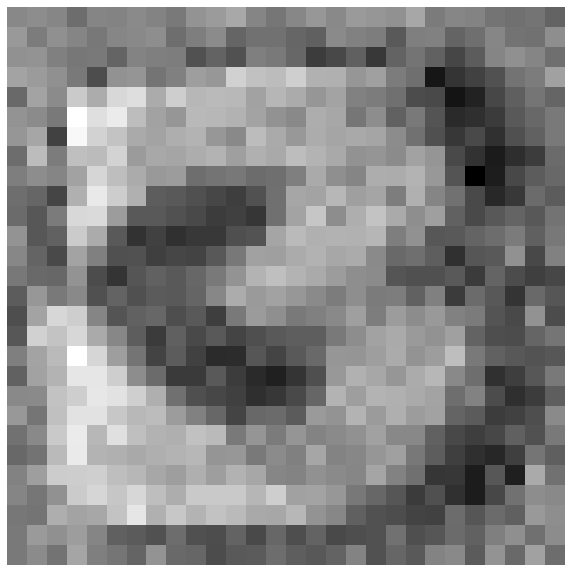

In [32]:
plot(W[:,3].reshape(28,28))

In [59]:
#zoomed in part of the pictures from the link

In [33]:
X.shape

torch.Size([60000, 784])

In [34]:
b = 40

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [35]:
x,y = get_batch('train')

In [36]:
x.shape

torch.Size([40, 784])

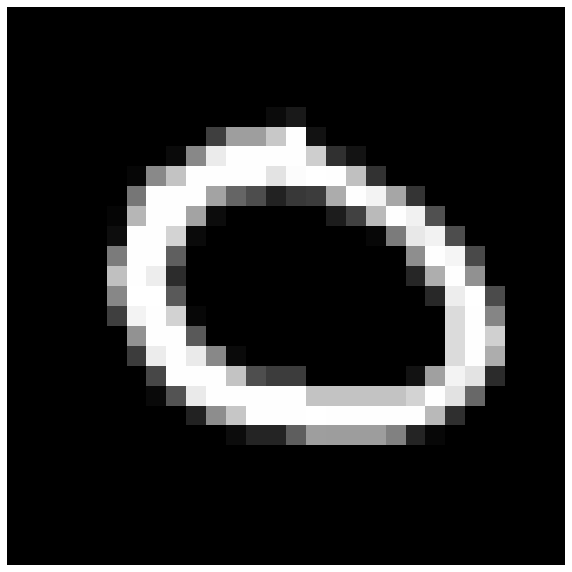

In [37]:
plot(x[0].reshape(28,28))

In [38]:
y

tensor([0., 3., 3., 4., 4., 7., 5., 8., 8., 9., 0., 0., 2., 1., 8., 2., 7., 3.,
        8., 4., 2., 7., 4., 8., 6., 9., 9., 0., 6., 0., 8., 1., 1., 0., 0., 1.,
        1., 5., 3., 3.], device='cuda:0')

In [39]:
x.shape, W.shape

(torch.Size([40, 784]), torch.Size([784, 10]))

In [40]:
torch.matmul(x,W).shape

torch.Size([40, 10])

In [41]:
(x@W).shape

torch.Size([40, 10])

In [42]:
y = x@W

In [43]:
y.shape

torch.Size([40, 10])

In [44]:
y

tensor([[  7.4801, -16.4270,  -0.2793, -11.6022, -11.0464,  -8.8720,   4.2608,
          -2.4170,  -1.7687,  -2.1200],
        [  0.9234,  -8.2455,  -0.5306,  14.1964,  -2.5034,   3.9692,  -8.7500,
          -5.7768,   4.0547,   0.3655],
        [ -2.1915,   0.0315,  -1.4050,   7.1925,  -0.5200,   0.3551,   0.1032,
          -7.0212,   0.3831,   1.2854],
        [ -1.3154,  -5.9851,  -0.6565,  -7.5489,   9.5615,  -5.2485,   3.2825,
          -1.3779,  -0.0783,   2.2080],
        [ -0.6500, -13.7817,  -4.3189,  -8.0124,   9.8174,  -7.8937,   2.1590,
           5.5986,   0.7386,   4.1657],
        [ -4.3711, -11.6651, -12.2543,  -5.4880,   5.3853,   3.2933,  -6.1363,
          10.6829,   2.3238,   2.7488],
        [  1.1062,  -9.9336, -14.8242,   1.3372,   0.9095,   6.7132,  -4.8250,
          -0.0899,  -1.3361,   4.8364],
        [  1.3418,  -9.2452,  -2.0804,   0.5518,  -1.3923,   7.4123,  -4.7836,
          -1.9991,  13.6759,  -0.4495],
        [ -1.8938,   0.0401,   0.9787,  -0.2788,

In [60]:
#y cordinated

In [45]:
torch.argmax(y,1)

tensor([0, 3, 3, 4, 4, 7, 5, 8, 8, 9, 0, 0, 2, 1, 8, 2, 7, 3, 8, 4, 2, 7, 4, 8,
        6, 9, 9, 0, 6, 0, 7, 1, 1, 0, 0, 1, 1, 5, 3, 3], device='cuda:0')

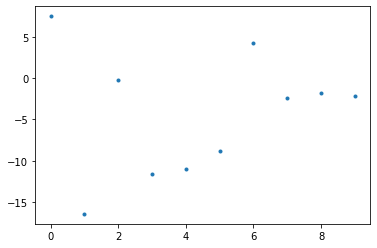

In [46]:
plt.plot(y[0].cpu().detach().numpy().T,'.')

https://eleif.net/clicktimer.html

In [ ]:
#plotted numbers from above in dot plot

In [47]:
x@W

tensor([[  7.4801, -16.4270,  -0.2793, -11.6022, -11.0464,  -8.8720,   4.2608,
          -2.4170,  -1.7687,  -2.1200],
        [  0.9234,  -8.2455,  -0.5306,  14.1964,  -2.5034,   3.9692,  -8.7500,
          -5.7768,   4.0547,   0.3655],
        [ -2.1915,   0.0315,  -1.4050,   7.1925,  -0.5200,   0.3551,   0.1032,
          -7.0212,   0.3831,   1.2854],
        [ -1.3154,  -5.9851,  -0.6565,  -7.5489,   9.5615,  -5.2485,   3.2825,
          -1.3779,  -0.0783,   2.2080],
        [ -0.6500, -13.7817,  -4.3189,  -8.0124,   9.8174,  -7.8937,   2.1590,
           5.5986,   0.7386,   4.1657],
        [ -4.3711, -11.6651, -12.2543,  -5.4880,   5.3853,   3.2933,  -6.1363,
          10.6829,   2.3238,   2.7488],
        [  1.1062,  -9.9336, -14.8242,   1.3372,   0.9095,   6.7132,  -4.8250,
          -0.0899,  -1.3361,   4.8364],
        [  1.3418,  -9.2452,  -2.0804,   0.5518,  -1.3923,   7.4123,  -4.7836,
          -1.9991,  13.6759,  -0.4495],
        [ -1.8938,   0.0401,   0.9787,  -0.2788,

In [48]:
y2 = x@W 

In [49]:
y2.shape

torch.Size([40, 10])

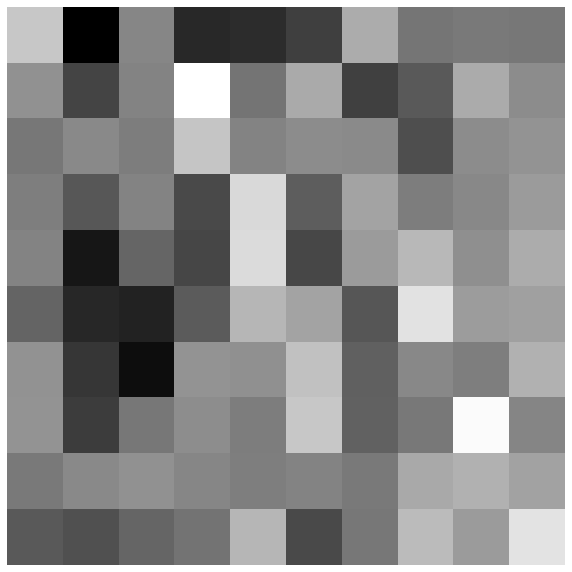

In [50]:
plot(y2[0:10,:])

In [61]:
#very zoomed in part of the picture from the link


In [51]:
y

tensor([[  7.4801, -16.4270,  -0.2793, -11.6022, -11.0464,  -8.8720,   4.2608,
          -2.4170,  -1.7687,  -2.1200],
        [  0.9234,  -8.2455,  -0.5306,  14.1964,  -2.5034,   3.9692,  -8.7500,
          -5.7768,   4.0547,   0.3655],
        [ -2.1915,   0.0315,  -1.4050,   7.1925,  -0.5200,   0.3551,   0.1032,
          -7.0212,   0.3831,   1.2854],
        [ -1.3154,  -5.9851,  -0.6565,  -7.5489,   9.5615,  -5.2485,   3.2825,
          -1.3779,  -0.0783,   2.2080],
        [ -0.6500, -13.7817,  -4.3189,  -8.0124,   9.8174,  -7.8937,   2.1590,
           5.5986,   0.7386,   4.1657],
        [ -4.3711, -11.6651, -12.2543,  -5.4880,   5.3853,   3.2933,  -6.1363,
          10.6829,   2.3238,   2.7488],
        [  1.1062,  -9.9336, -14.8242,   1.3372,   0.9095,   6.7132,  -4.8250,
          -0.0899,  -1.3361,   4.8364],
        [  1.3418,  -9.2452,  -2.0804,   0.5518,  -1.3923,   7.4123,  -4.7836,
          -1.9991,  13.6759,  -0.4495],
        [ -1.8938,   0.0401,   0.9787,  -0.2788,

In [63]:
one_hot(y)

ValueError: ignored

In [64]:
plot(one_hot(y))

ValueError: ignored

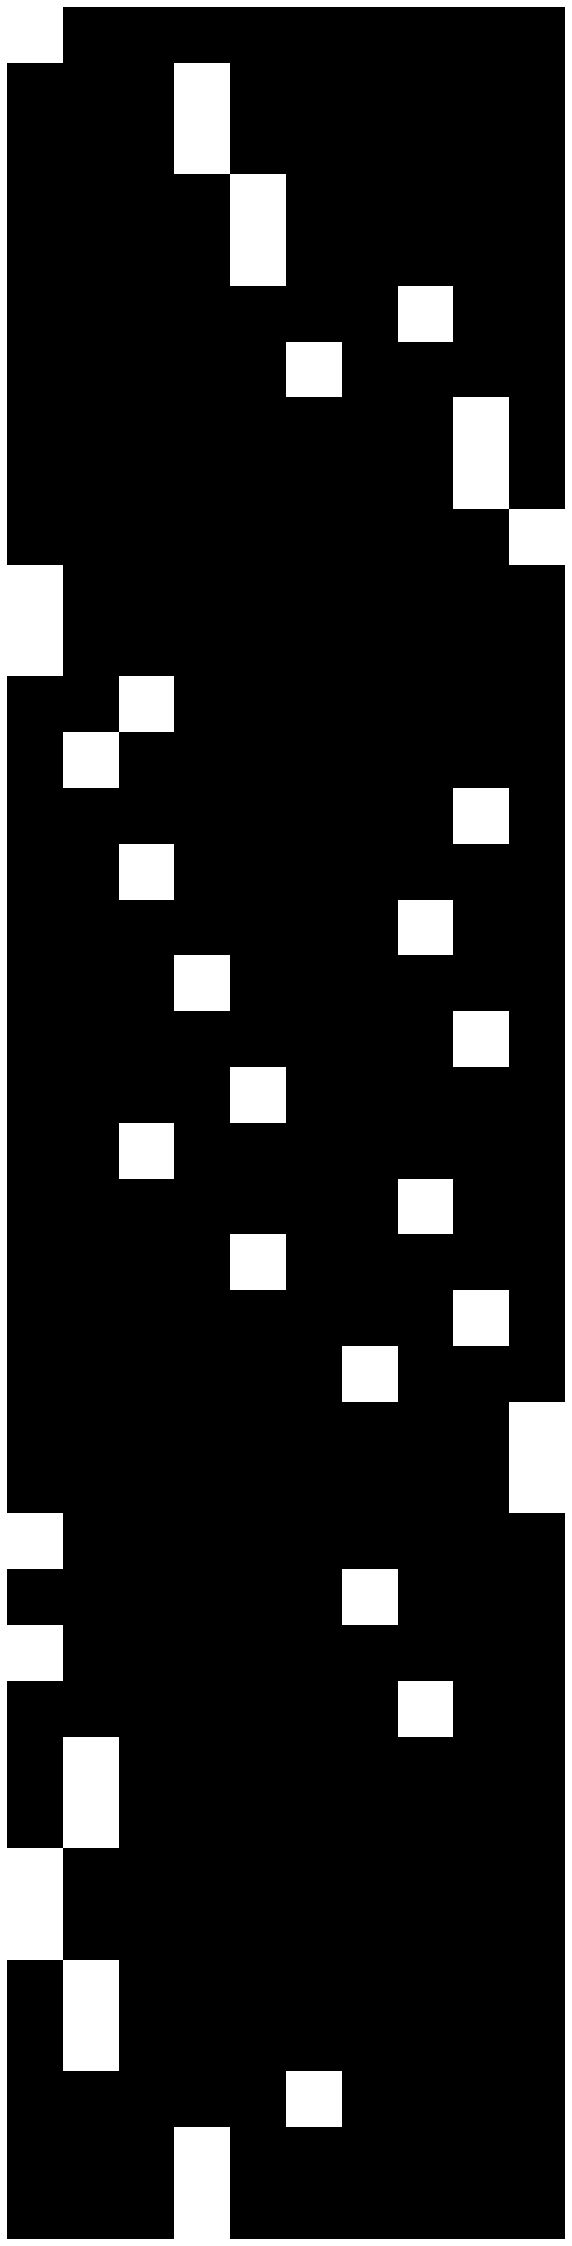

In [65]:
plot(one_hot(torch.argmax(y2,1)))

In [66]:
y

tensor([[  7.4801, -16.4270,  -0.2793, -11.6022, -11.0464,  -8.8720,   4.2608,
          -2.4170,  -1.7687,  -2.1200],
        [  0.9234,  -8.2455,  -0.5306,  14.1964,  -2.5034,   3.9692,  -8.7500,
          -5.7768,   4.0547,   0.3655],
        [ -2.1915,   0.0315,  -1.4050,   7.1925,  -0.5200,   0.3551,   0.1032,
          -7.0212,   0.3831,   1.2854],
        [ -1.3154,  -5.9851,  -0.6565,  -7.5489,   9.5615,  -5.2485,   3.2825,
          -1.3779,  -0.0783,   2.2080],
        [ -0.6500, -13.7817,  -4.3189,  -8.0124,   9.8174,  -7.8937,   2.1590,
           5.5986,   0.7386,   4.1657],
        [ -4.3711, -11.6651, -12.2543,  -5.4880,   5.3853,   3.2933,  -6.1363,
          10.6829,   2.3238,   2.7488],
        [  1.1062,  -9.9336, -14.8242,   1.3372,   0.9095,   6.7132,  -4.8250,
          -0.0899,  -1.3361,   4.8364],
        [  1.3418,  -9.2452,  -2.0804,   0.5518,  -1.3923,   7.4123,  -4.7836,
          -1.9991,  13.6759,  -0.4495],
        [ -1.8938,   0.0401,   0.9787,  -0.2788,

In [67]:
torch.argmax(y2,1)

tensor([0, 3, 3, 4, 4, 7, 5, 8, 8, 9, 0, 0, 2, 1, 8, 2, 7, 3, 8, 4, 2, 7, 4, 8,
        6, 9, 9, 0, 6, 0, 7, 1, 1, 0, 0, 1, 1, 5, 3, 3], device='cuda:0')

In [68]:
b

40

In [69]:
torch.sum(y == torch.argmax(y2,1))/b

RuntimeError: ignored

In [70]:
X.shape

torch.Size([60000, 784])

In [71]:
%%timeit
X[20000]@W

27 µs ± 1.33 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [72]:
torch.argmax(X@W,1)

tensor([5, 0, 4,  ..., 5, 6, 8], device='cuda:0')

In [73]:
Y

tensor([5., 0., 4.,  ..., 5., 6., 8.], device='cuda:0')

In [ ]:
#data containor of y cordinates

In [74]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.9122, device='cuda:0')

In [75]:
X@W

tensor([[  1.1735,  -5.3252,  -2.2280,  ...,   2.8160,  -2.5256,  -4.7146],
        [ 14.1848, -13.8266,  -2.0614,  ...,  -2.7536,  -0.4526,  -5.3169],
        [ -3.9527,  -9.5646,  -3.1270,  ...,  -0.5796,  -2.7272,   0.5264],
        ...,
        [  1.7139,  -3.4259, -10.8608,  ...,  -0.3874,   5.0143,   0.4739],
        [  3.0898, -10.5911,  -2.0102,  ...,  -4.0874,  -7.1931,  -2.6339],
        [  2.8741,  -6.6511,  -1.8780,  ...,  -3.2709,   7.5771,   1.3491]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [76]:
W.shape

torch.Size([784, 10])

In [77]:
W[:,0].shape

torch.Size([784])

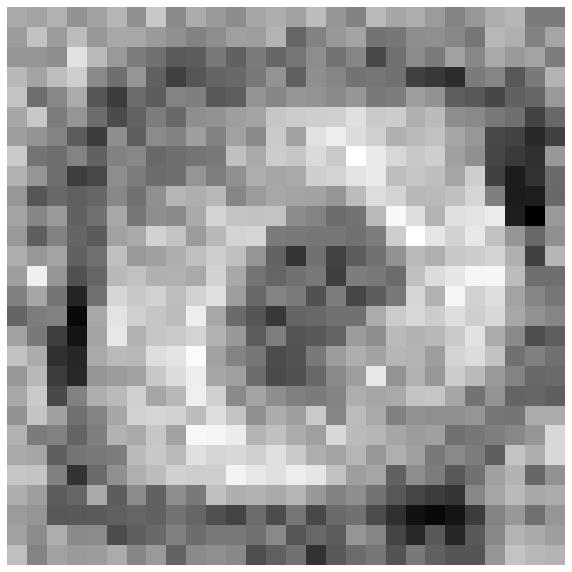

In [78]:
plot(W[:,0].reshape(28,28))

In [ ]:
#less zommed in pictures using a brouder cordinates

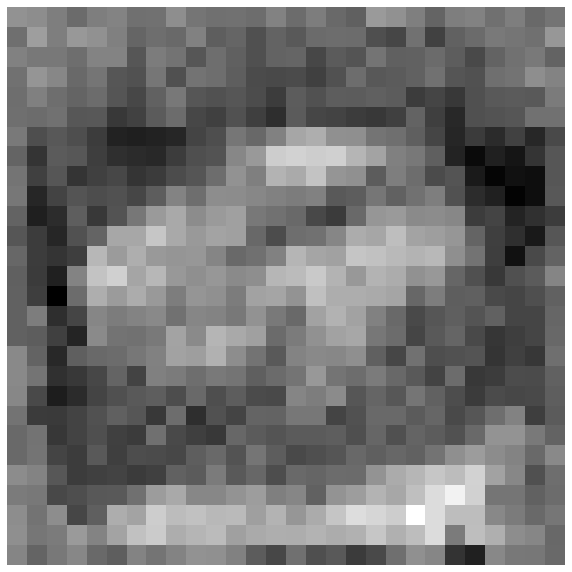

In [79]:
plot(W[:,9].reshape(28,28))

In [80]:
W.shape

torch.Size([784, 10])

In [81]:
(W.T).shape

torch.Size([10, 784])

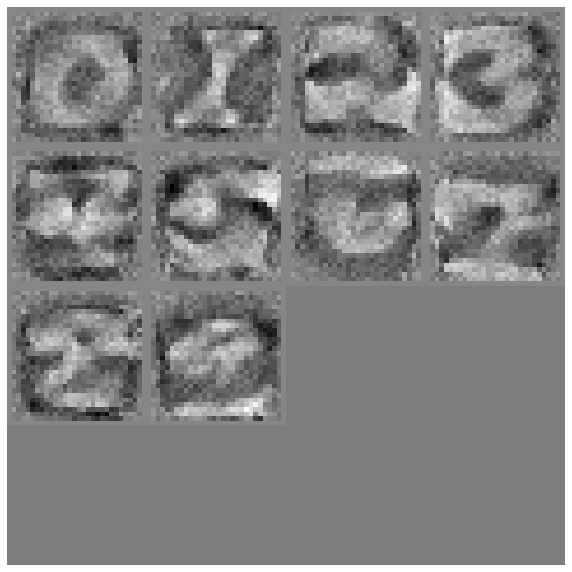

In [82]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
#pictures all together

In [83]:
###################################################

In [84]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [85]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [86]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [87]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [88]:
X.shape

torch.Size([60000, 784])

In [89]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [90]:
def model(x,w):

    return x@w[0]

In [91]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [93]:
wb.init(project="Simple_Linear_Adam_KMNIST");
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 1000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    # if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/click/termui.py", line 129, in prompt_func
    return f("")
  File "/usr/local/lib/python3.8/dist-packages/click/termui.py", line 54, in hidden_prompt_func
    return getpass.getpass(prompt)
  File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 843, in getpass
    return self._input_request(prompt,
  File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 904, in _input_request
    raise KeyboardInterrupt("Interrupted by user") from None
KeyboardInterrupt: Interrupted by user

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/

Exception: ignored

#Generator

In [94]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [95]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

In [96]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
batch_size = 512

In [97]:
#it has a batch size of 512

In [98]:
# #MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [99]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [100]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [101]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [102]:
###################################################

In [103]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [104]:
X = GPU_data(X)
X_test = GPU_data(X_test)

Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [105]:
X = (X + 1)/2
X_test = (X_test + 1)/2

In [106]:
def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:,:,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:,:,:]
        y = Y_test[r:r+b]
    return x,y

In [107]:
x,y = get_batch('train')

NameError: ignored

(array([25497.,   412.,   338.,   312.,   343.,   352.,   350.,   354.,
          410.,  2992.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

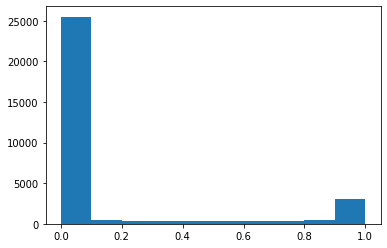

In [108]:
plt.hist(x.flatten().cpu().numpy())

In [109]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

IndexError: ignored

In [110]:
X = X.view(-1,784)
X_test = X_test.view(-1,784)

def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [111]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [112]:
def MSE(image_batch_recon, image_batch):
    return torch.mean((image_batch_recon - image_batch)**2)

In [113]:
def Encoder(x,w):
    return x@w[0]

In [114]:
def Decoder(x,w):
    return x@(w[0].T)

In [115]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

In [116]:
batch_size = 512
steps = 10000
learning_rate = 4e-3

In [117]:
w0 = GPU(randn_trunc((784,78)))
w = [w0]

optimizer = torch.optim.Adam(params=w, lr=learning_rate, weight_decay=1e-5)

for step in range(steps):
        
    x,y = get_batch('train')
    
    # autoencoder reconstruction
    x2 = Autoencoder(x,w)
    
    # reconstruction error
    loss = MSE(x2, x)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    if step % 1000 == 0:
        print(loss.item())

0.3953220844268799
0.004428706597536802
0.0035109540913254023
0.0033926537726074457
0.0031273462809622288
0.003658763598650694
0.003548812121152878
0.0036013375502079725
0.0032402179203927517
0.003277396084740758


In [118]:
# batch_size = 16

In [119]:
x,y = get_batch('test')

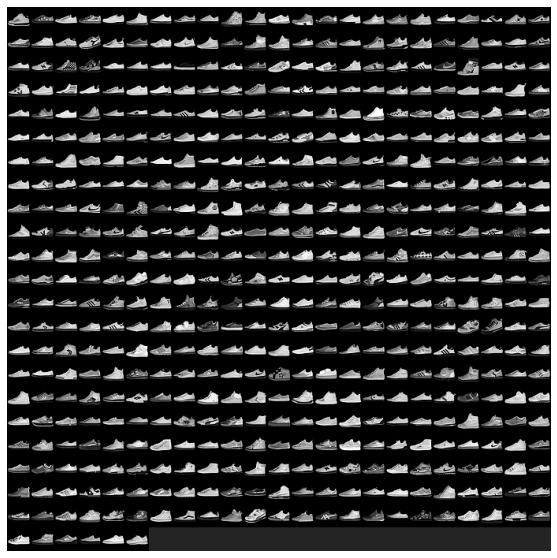

In [120]:
montage_plot(x.reshape(-1,28,28).detach().cpu().numpy())

In [121]:
x.shape

torch.Size([512, 784])

In [122]:
Decoder(Encoder(x,w),w).shape

torch.Size([512, 784])

In [123]:
x2 = Autoencoder(x,w)

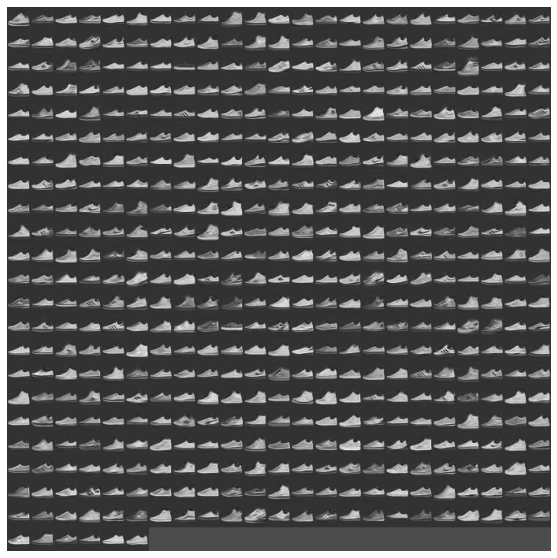

In [124]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())

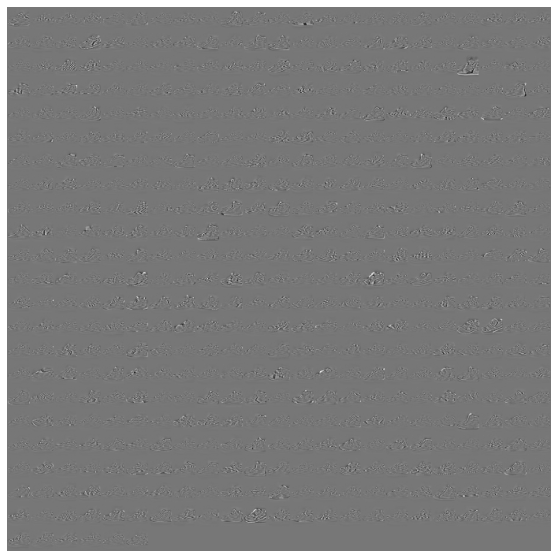

In [125]:
montage_plot((x-x2).reshape(-1,28,28).detach().cpu().numpy())

In [126]:
w[0].shape

torch.Size([784, 78])

In [127]:
wp = w[0].T 

In [128]:
wp = wp.reshape(-1,28,28)

In [129]:
wp.shape

torch.Size([78, 28, 28])

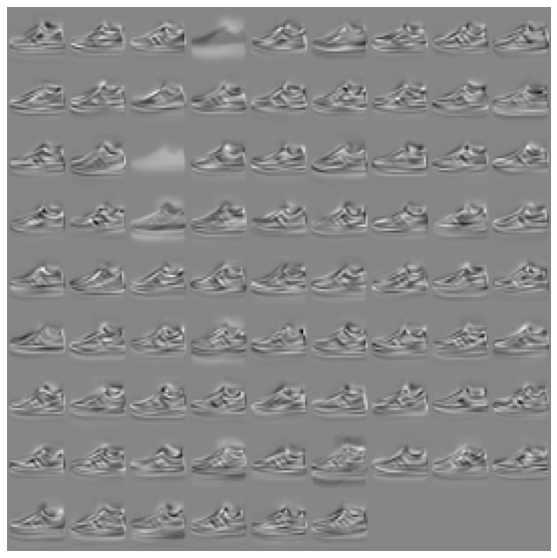

In [130]:
montage_plot(wp.detach().cpu().numpy())

In [131]:
x.shape

torch.Size([512, 784])

In [132]:
x = x[0:1]

In [133]:
y = Encoder(x,w)

In [134]:
y.shape

torch.Size([1, 78])

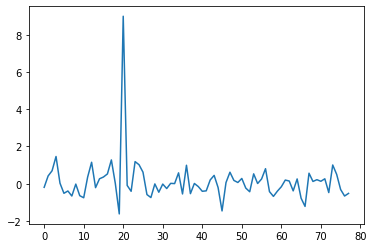

In [135]:
plt.plot(y[0].cpu().detach().numpy())

In [136]:
noise = 0.5*np.random.randn(78)

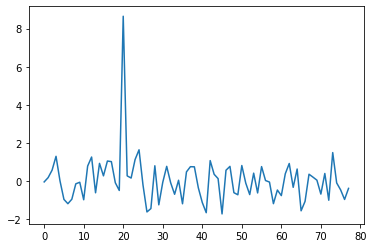

In [137]:
plt.plot(y[0].cpu().detach().numpy() + noise)

In [138]:
noise

array([ 0.15833059, -0.22793286, -0.11628648, -0.15413961, -0.00665825,
       -0.43800966, -0.78761915, -0.28199699, -0.11533573,  0.58913606,
       -0.21712479,  0.43705051,  0.11797411, -0.39412381,  0.67204345,
       -0.07720711,  0.53546663, -0.24884317, -0.0922282 ,  1.13795125,
       -0.33969383,  0.37333554,  0.5749172 , -0.0502494 ,  0.62900531,
       -0.81376453, -1.02828033, -0.69008065,  0.82259071, -0.7811677 ,
       -0.03897975,  1.03975394, -0.09877595, -0.69007508, -0.53190383,
       -0.63222901, -0.49874038,  1.29603827,  0.74297438, -0.18876568,
       -0.70783013, -1.26722615,  0.88115214, -0.08291193,  0.34391401,
       -0.25255654,  0.51579085,  0.16138159, -0.77604927, -0.77531046,
        0.54162207,  0.13643956, -0.26834025, -0.10570458, -0.62484686,
        0.51402825, -0.76938212,  0.38134916, -0.49640437, -0.06101419,
       -0.59033719,  0.19555648,  0.78578   ,  0.06525134,  0.38428789,
       -0.77135473,  0.16267254, -0.19596443,  0.09434573, -0.15

In [139]:
noise = GPU(noise)

In [140]:
x2 = Decoder(y+noise,w)

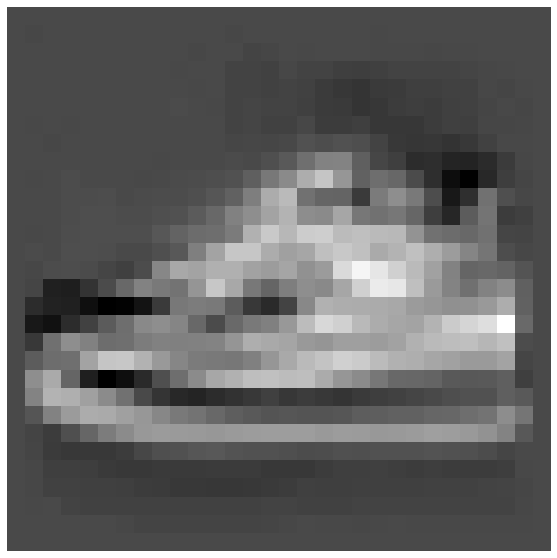

In [141]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())

In [142]:
x2 = Decoder(y,w)

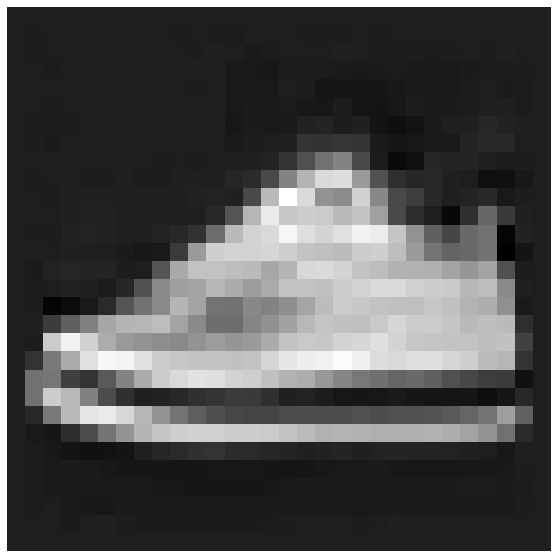

In [143]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())